# Analyse descriptive et spatiale

L'objectif de cette partie est d'explorer les bases et les différentes variables d'intérêt, et de perfectionner nos indicateurs créés si besoin. Nous allons aussi représenter graphiquement et spatialement nos variables d'intérêt, pour effectuer de premières analyses. A ce stade, nous chargeons les bases créées dans le notebook 1_base pour ne pas avoir à refaire tourner complètement le code à chaque fois, car il met un certain temps.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import pynsee 
from cartiflette.s3 import download_vectorfile_url_all

/home/cathu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Chargement des données

### Données brutes 

In [20]:
url1 = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"

In [21]:
velib_spat = gpd.read_file(url1)

In [24]:
velo_spat = gpd.read_file('amenagements-velo-en-ile-de-france.geojson')

In [51]:
print(velo_spat.columns)

Index(['osm_id', 'nom_com', 'sens_voit', 'ag', 'panneaux', 'moyenn_ech',
       'revetement', 'highway', 'insee_com', 'nom_voie', 'longueur',
       'petite_ech', 'nv', 'ad', 'geometry', 'piste'],
      dtype='object')


### Nos données d'étude

In [4]:
df_velib = gpd.read_file('df_velib.geojson')
print(df_velib.columns)

Index(['INSEE_COM', 'cap_com', 'stat_com', 'NOM', 'NOM_M', 'STATUT',
       'POPULATION', 'INSEE_DEP', 'INSEE_REG', 'surface', 'geometry'],
      dtype='object')


In [6]:
df_velo = gpd.read_file('df_velo.geojson')
print(df_velo.columns)

Index(['nom_com', 'insee_com', 'longueur', 'longueur_pond_hw',
       'longueur_pond_adg', 'difference_hw', 'difference_adg', 'cap_com',
       'stat_com', 'source', 'surface', 'population', 'geometry'],
      dtype='object')


In [7]:
base = pd.read_csv("base_finale.csv")
print(base.columns)

Index(['CODGEO', 'SUPERF', 'P20_RP', 'MED20', 'TP6020', 'P20_EMPLT', 'ETOQ21',
       'nom_com', 'insee_com', 'longueur', 'longueur_pond_hw',
       'longueur_pond_adg', 'difference_hw', 'difference_adg', 'cap_com',
       'stat_com', 'source', 'surface', 'population', 'geometry', 'dep', 'com',
       'mort_com', 'hosp_com', 'indemne_com', 'leger_com', 'acc_com'],
      dtype='object')


### Données nécessaires pour l'analyse spatiale

In [8]:
communes = download_vectorfile_url_all(
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    values = ["75","77","78","91", "92", "93", "94","95"],
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 2.18MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.57MiB [00:00, 14.1MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 581kiB [00:00, 8.95MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 483kiB [00:00, 6.93MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 2.96MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 120kiB [00:00, 3.29MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 3.54MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 372kiB [00:00, 6.26MiB/s]


In [9]:
communes['surface'] = communes.to_crs(2154).area

In [10]:
communes.sort_values('surface', ascending = False)

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry,surface
111,COMMUNE_0000000009739723,None,Fontainebleau,FONTAINEBLEAU,77186,Sous-préfecture,15696,07,4,77,11,200072346,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77186,"POLYGON ((2.74740 48.48329, 2.74783 48.48327, ...",1.722864e+08
148,COMMUNE_0000002200276627,None,Saint-Germain-en-Laye,SAINT-GERMAIN-EN-LAYE,78551,Sous-préfecture,44806,16,3,78,11,200058519,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78551,"POLYGON ((2.07077 48.94649, 2.07138 48.94676, ...",5.313401e+07
135,COMMUNE_0000002200276622,None,Chenoise-Cucharmoy,CHENOISE-CUCHARMOY,77109,Commune simple,1640,18,3,77,11,200037133,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77109,"POLYGON ((3.13963 48.59977, 3.13951 48.59983, ...",4.874811e+07
229,COMMUNE_0000000009738401,None,Sonchamp,SONCHAMP,78601,Commune simple,1600,14,2,78,11,200073344,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78601,"POLYGON ((1.83232 48.56349, 1.83260 48.56506, ...",4.634931e+07
152,COMMUNE_0000000009739738,None,Étampes,ETAMPES,91223,Sous-préfecture,25629,08,1,91,11,200017846,IGN:EXPRESS-COG-CARTO-TERRITOIRE,91223,"POLYGON ((2.23350 48.39672, 2.23293 48.39656, ...",4.596232e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,COMMUNE_0000000009736527,None,Saint-Mandé,SAINT-MANDE,94067,Commune simple,22377,23,2,94,11,200054781/200057941,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94067,"POLYGON ((2.41900 48.84939, 2.41900 48.84935, ...",9.057590e+05
155,COMMUNE_0000000009734016,None,Gouzangrez,GOUZANGREZ,95282,Commune simple,160,16,3,95,11,200035970,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95282,"POLYGON ((1.90588 49.11131, 1.90559 49.11143, ...",7.725902e+05
181,COMMUNE_0000000009735023,None,Margency,MARGENCY,95369,Commune simple,2846,15,2,95,11,200056380,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95369,"POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...",7.250545e+05
11,COMMUNE_0000000009736027,None,Le Pré-Saint-Gervais,LE PRE-SAINT-GERVAIS,93061,Commune simple,17351,15,1,93,11,200054781/200057875,IGN:EXPRESS-COG-CARTO-TERRITOIRE,93061,"POLYGON ((2.41151 48.88322, 2.41148 48.88315, ...",7.027441e+05


In [11]:
communes.rename(columns={'INSEE_COG': 'insee_com'}, inplace=True)

In [12]:
print(communes.columns)

Index(['id', 'ID', 'NOM', 'NOM_M', 'INSEE_COM', 'STATUT', 'POPULATION',
       'INSEE_CAN', 'INSEE_ARR', 'INSEE_DEP', 'INSEE_REG', 'SIREN_EPCI',
       'source', 'insee_com', 'geometry', 'surface'],
      dtype='object')


## Quelques statistiques descriptives

### Aménagements vélib

In [27]:
df_velib.describe()

,cap_com,stat_com,POPULATION,surface
count,82.000000,82.000000,82.000000,8.200000e+01
mean,556.780488,17.951220,63695.134146,5.034362e+06
std,713.441408,21.245713,49138.293016,3.796924e+06
min,0.000000,1.000000,11225.000000,7.027441e+05
25%,120.500000,4.000000,29702.000000,2.298873e+06
50%,236.000000,8.000000,48441.000000,3.840089e+06
75%,709.000000,22.750000,80747.750000,6.088795e+06
max,3345.000000,90.000000,230981.000000,1.740858e+07


### Aménagements cyclables

In [39]:
sns.set(style="whitegrid")

In [25]:
df_velo.describe()

,longueur,longueur_pond_hw,longueur_pond_adg,difference_hw,difference_adg,cap_com,stat_com,surface,population
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,82.000000,82.000000,1.005000e+03,1005.000000
mean,14104.276617,13958.353731,14310.651244,-145.922886,206.374627,556.780488,17.951220,8.955252e+06,12040.500498
std,24139.660522,23629.009724,23513.063958,1425.025097,2915.169853,713.441408,21.245713,8.147897e+06,23891.323510
min,2.000000,2.500000,2.500000,-12902.000000,-22854.000000,0.000000,1.000000,9.722876e+04,50.000000
25%,1476.000000,1466.250000,1643.250000,-273.500000,0.000000,120.500000,4.000000,4.481700e+06,850.000000
50%,5293.000000,5337.000000,5725.000000,-8.750000,155.000000,236.000000,8.000000,7.343944e+06,2699.000000
75%,15626.000000,15930.250000,16379.250000,165.500000,870.500000,709.000000,22.750000,1.135592e+07,12266.000000
max,228240.000000,226273.250000,231651.000000,15562.250000,20850.500000,3345.000000,90.000000,1.722864e+08,230981.000000


Text(0.5, 1.0, 'Distribution des pistes cyclables dans les communes')

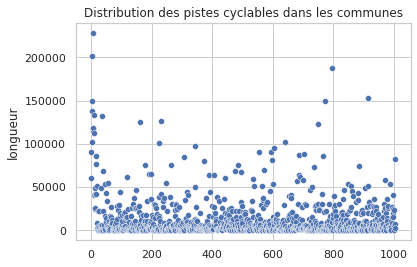

In [40]:
sns.scatterplot(df_velo['longueur'])
plt.title('Distribution des pistes cyclables dans les communes')

Text(0.5, 1.0, 'Distribution des pistes cyclables selon la population')

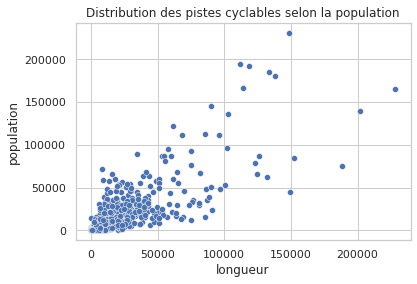

In [41]:
sns.scatterplot(x=df_velo['longueur'], y=df_velo['population'])
plt.title('Distribution des pistes cyclables selon la population')

Text(0.5, 1.0, 'Distribution des pistes cyclables selon la population (pondérée par la qualtié 1')

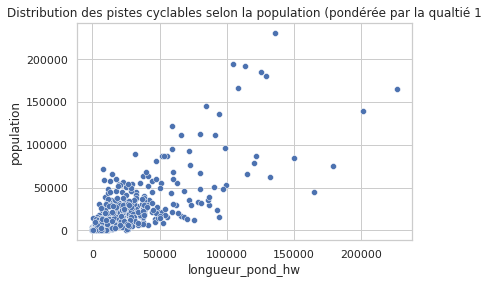

In [42]:
sns.scatterplot(x=df_velo['longueur_pond_hw'],y=df_velo['population'])
plt.title('Distribution des pistes cyclables selon la population (pondérée par la qualtié 1')

Text(0.5, 1.0, 'Distribution des pistes cyclables selon la population (pondérée par la qualité 2)')

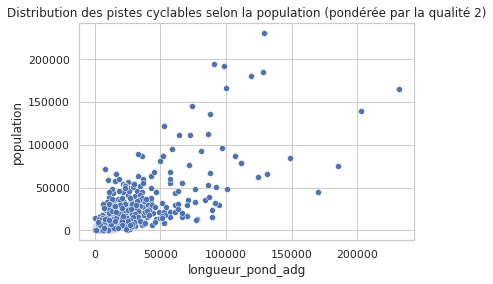

In [43]:
sns.scatterplot(x=df_velo['longueur_pond_adg'], y=df_velo['population'])
plt.title('Distribution des pistes cyclables selon la population (pondérée par la qualité 2)')

Que ce soit dans les données descriptives, ou dans les graphiques de distribution, il semble que nos longueurs pondérées apportent peu d'informations par rapport aux longueurs normales.

Nous créons deux nouvelles variables d'intérêt : la densité géographique (longueur de d'aménagements cyclables sur surface de la commune) et la densité démographique (longueur d'aménagements cycables sur population de la commune). 

In [44]:
base['long_surf']= base['longueur']/base['surface']

Text(0.5, 1.0, 'Distribution des densités de longueur (géographique)')

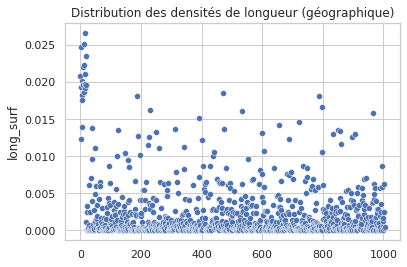

In [47]:
sns.scatterplot(base['long_surf'])
plt.title('Distribution des densités de longueur (géographique)')

In [45]:
base['long_pop']= base['longueur']/base['population']

Text(0.5, 1.0, 'Distribution des densités de longueur (démographique)')

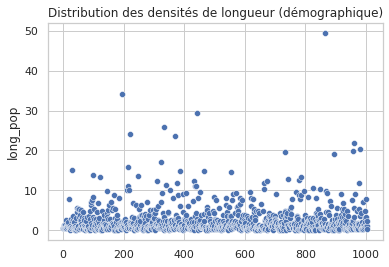

In [48]:
sns.scatterplot(base['long_pop'])
plt.title('Distribution des densités de longueur (démographique)')

In [50]:
base.describe()

,CODGEO,SUPERF,P20_RP,P20_EMPLT,ETOQ21,insee_com,longueur,longueur_pond_hw,longueur_pond_adg,difference_hw,...,population,dep,com,mort_com,hosp_com,indemne_com,leger_com,acc_com,long_surf,long_pop
count,1005.000000,985.000000,985.000000,985.000000,985.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,...,1005.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,1.005000e+03,1005.000000
mean,84832.089552,8.984548,4161.244593,3998.114104,30.808122,84832.089552,14104.276617,13958.353731,14310.651244,-145.922886,...,12040.500498,85.299094,85559.551360,0.416918,2.799094,26.185801,26.706949,56.232628,2.319313e-03,2.598625
std,7930.037655,8.141997,7227.416028,9815.728109,55.740130,7930.037655,24139.660522,23629.009724,23513.063958,1425.025097,...,23891.323510,7.988151,7971.299142,0.790383,4.484682,60.449628,60.573746,125.325972,3.931067e-03,3.744216
min,75101.000000,0.090000,21.200000,3.355556,0.000000,75101.000000,2.000000,2.500000,2.500000,-12902.000000,...,50.000000,75.000000,75101.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.104880e-07,0.004115
25%,77423.000000,4.560000,320.138431,118.691477,3.000000,77423.000000,1476.000000,1466.250000,1643.250000,-273.500000,...,850.000000,77.000000,77435.500000,0.000000,0.000000,1.000000,1.000000,3.000000,2.026375e-04,0.647300
50%,78550.000000,7.360000,988.199937,599.673560,8.000000,78550.000000,5293.000000,5337.000000,5725.000000,-8.750000,...,2699.000000,91.000000,91046.000000,0.000000,1.000000,4.000000,4.000000,10.000000,7.671503e-04,1.417497
75%,93027.000000,11.330000,4403.753165,3451.263639,32.000000,93027.000000,15626.000000,15930.250000,16379.250000,165.500000,...,12266.000000,93.000000,93061.750000,1.000000,3.000000,21.000000,22.000000,46.000000,2.583364e-03,2.965315
max,95690.000000,172.050000,59417.772923,100483.060628,502.000000,95690.000000,228240.000000,226273.250000,231651.000000,15562.250000,...,230981.000000,95.000000,95690.000000,5.000000,43.000000,606.000000,594.000000,1247.000000,2.665648e-02,49.460000


Les distributions de la densité d'aménagements cyclables géographique et démographique sont très différentes. Pour rappel, la densité géographique est le nombre de mètres d'aménagements cyclables par m2, et la densité démographiques est le nombre de mètres d'aménagements par habitants.

Nous regardons la distribution des différentes variables de notre base finale.

In [ ]:
sns.pairplot(base, diag_kind='kde')

## Analyse spatiale

### Analyse de la répartition spatiale des bornes vélib

Les vélibs ne se trouvent pas dans toutes les communes d'Ile de France. Nous choisissons donc uniquement les communes concernées pour représenter la répartition des vélibs.

In [22]:
com_velib = communes[((communes['INSEE_DEP'].isin(["75", "92"])) & 
                (~communes['insee_com'].isin(['92002', '92019', '92060', '92047', '92076','92033'])) 
                | (communes['insee_com'].isin(['95018', '94081', '94041', '94037', '94076', '94002', 
                                               '94046', '94016', '94080', '94200', '94016', '94041', '94069',
                                               '94042', '94052', '94022', '94100', '94017', '93006', '93055', 
                                               '93001', '93070', '93066', '93048', '94033', '93063', '93053', 
                                               '93063', '93008', '93064', '94018'])))]

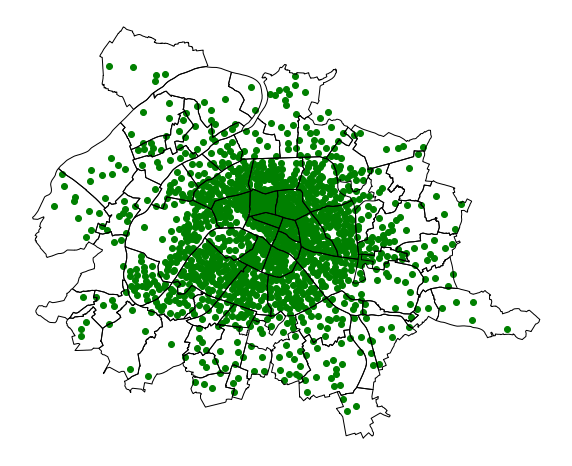

In [23]:
fig,ax = plt.subplots(figsize=(10, 10))
velib_spat.plot(ax = ax, color = 'green')
com_velib.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

### Répartition géographique des pistes cyclables

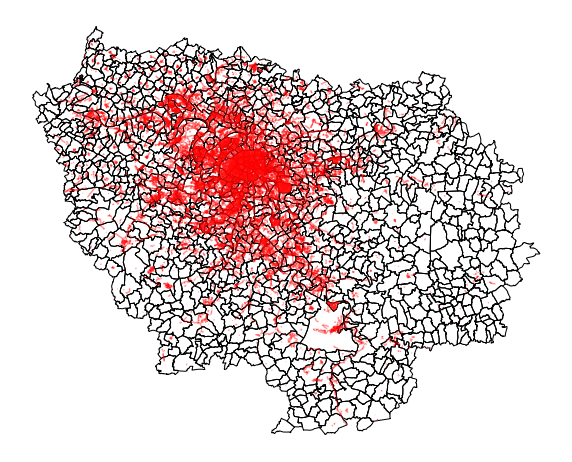

In [26]:
fig,ax = plt.subplots(figsize=(10, 10))
velo_spat.plot(ax = ax, color = 'red', alpha = 0.4, zorder=2)
communes.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

On "zoome" sur la petite couronne parisienne où sont concentrées les pistes cyclables. Pour comparer avec la répartition des vélibs, on définit la petite couronne ici comme l'ensemble des communes où se trouvent des stations vélibs.

In [64]:
velo_spat_pc = velo_spat[(velo_spat['insee_com'].str.startswith(('75', '92'))) 
                | (velo_spat['insee_com'].isin(['95018', '94081', '94041', '94037', '94076', '94002', 
                                               '94046', '94016', '94080', '94200', '94016', '94041', '94069',
                                               '94042', '94052', '94022', '94100', '94017', '93006', '93055', 
                                               '93001', '93070', '93066', '93048', '94033', '93063', '93053', 
                                               '93063', '93008', '93064', '94018']))]

communes_pc = communes[(communes['insee_com'].str.startswith(('75', '92'))) 
                | (communes['insee_com'].isin(['95018', '94081', '94041', '94037', '94076', '94002', 
                                               '94046', '94016', '94080', '94200', '94016', '94041', '94069',
                                               '94042', '94052', '94022', '94100', '94017', '93006', '93055', 
                                               '93001', '93070', '93066', '93048', '94033', '93063', '93053', 
                                               '93063', '93008', '93064', '94018']))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


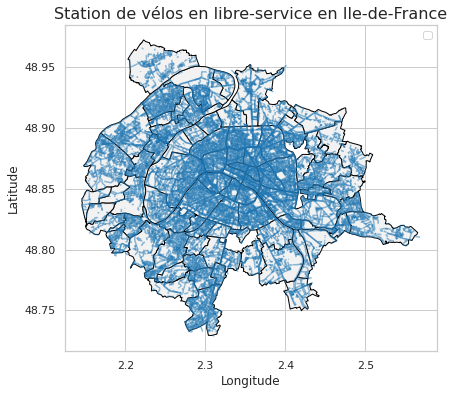

In [65]:
fig, ax = plt.subplots(figsize = (11,6))
communes_pc.plot(ax=ax, color = '0.95', edgecolor = 'black')

velo_spat_pc['geometry'].plot(ax=ax, color='tab:blue', alpha =0.5, markersize=20)

plt.title('Station de vélos en libre-service en Ile-de-France', fontsize =16)
ax.set_xlabel('Longitude', fontsize=12) 
ax.set_ylabel('Latitude', fontsize =12) 
plt.legend()
plt.show()

/home/cathu/.local/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


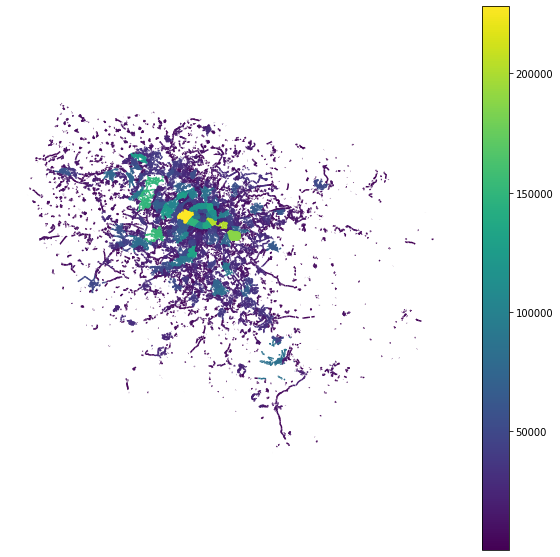

In [33]:
# Répartition des pistes cyclabes en île de France

fig, ax = plt.subplots(figsize=(10, 10))
dissolved = velo_spat.dissolve(by='insee_com', aggfunc='sum').reset_index()
dissolved.plot(ax=ax, column="longueur", legend=True)
ax.set_axis_off()
legend = ax.get_legend()
plt.show()

Sur la figure, on observe que les pistes cyclables sont concentrées autours du département 75. Plus on s'éloigne plus le nombre diminue.